In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
df = pd.read_csv(r'D:\Google Drive\University of York courses\Independent Research Proposal\dissertation\data\preprocessed\preprocessed_final_data.csv')
print("Rows: ", df.shape[0])
print("Features: " + str(df.shape[1]) + "\n")

Rows:  65340
Features: 38



# 5. Dataset for time series forecasting (feature engineering)

In [3]:
df.head()

,unique_id,month_event,year_event,key_neighb,name_neigh,key_boroug,name_borou,cablebus_s,commer_ven,health_cen,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_s,cablebus_l,ptransp_ro,main_roads,metro_line,rtp_lines,train_line,trolebus_l,centres_va,be_schools,commercial,industrial,service_un,crime_count,women_vic,men_vic,less than 18,18 to 29,30 to 39,40 to 49,50 to 59,more than 60,geometry
0,2019502-001,5,2019,02-001,AGUILERA,2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43,1,0,2,1,0,1,0,0,0,POLYGON ((483311.6179775769 2153254.8476758953...
1,2019502-002,5,2019,02-002,ALDANA,2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,0,0,2,1,0,4,0,1,0,2,52,13,56,1,0,0,0,0,0,0,0,0,POLYGON ((484406.9560281149 2153012.3314251634...
2,2019502-005,5,2019,02-005,ANGEL ZIMBRON,2,AZCAPOTZALCO,0,0,0,1,0,2,0,0,0,0,30,0,1,6,0,0,0,3,53,10,89,3,2,1,1,2,0,0,0,0,POLYGON ((480013.7551967221 2153003.6181812417...
3,2019502-006,5,2019,02-006,ARENAL,2,AZCAPOTZALCO,0,0,0,0,1,0,1,0,0,0,6,0,0,3,0,0,0,4,164,22,88,5,4,2,2,2,0,1,0,0,POLYGON ((484061.1177966297 2152622.2835685736...
4,2019502-007,5,2019,02-007,CENTRO DE AZCAPOTZALCO,2,AZCAPOTZALCO,0,5,0,0,1,14,6,0,6,0,38,2,0,10,0,2,1,7,509,24,438,14,2,6,2,0,3,0,0,2,POLYGON ((480104.70719853905 2154525.214098416...


In [4]:
df.columns

Index(['unique_id', 'month_event', 'year_event', 'key_neighb', 'name_neigh', 'key_boroug', 'name_borou', 'cablebus_s', 'commer_ven', 'health_cen', 'metro_sta', 'pmarkets', 'pparking', 'hospitals', 'train_sta', 'trolebus_s', 'cablebus_l', 'ptransp_ro', 'main_roads', 'metro_line', 'rtp_lines', 'train_line', 'trolebus_l', 'centres_va', 'be_schools', 'commercial', 'industrial', 'service_un', 'crime_count', 'women_vic', 'men_vic', 'less than 18', '18 to 29', '30 to 39', '40 to 49', '50 to 59', 'more than 60', 'geometry'], dtype='object')

In [5]:
df_ts = df.drop(['name_neigh', 'key_boroug', 'name_borou', 'geometry'], axis=1)
df_ts.set_index('unique_id', inplace=True)
df_ts.head()

,month_event,year_event,key_neighb,cablebus_s,commer_ven,health_cen,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_s,cablebus_l,ptransp_ro,main_roads,metro_line,rtp_lines,train_line,trolebus_l,centres_va,be_schools,commercial,industrial,service_un,crime_count,women_vic,men_vic,less than 18,18 to 29,30 to 39,40 to 49,50 to 59,more than 60
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019502-001,5,2019,02-001,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43,1,0,2,1,0,1,0,0,0
2019502-002,5,2019,02-002,0,0,0,0,0,0,0,0,0,0,2,1,0,4,0,1,0,2,52,13,56,1,0,0,0,0,0,0,0,0
2019502-005,5,2019,02-005,0,0,0,1,0,2,0,0,0,0,30,0,1,6,0,0,0,3,53,10,89,3,2,1,1,2,0,0,0,0
2019502-006,5,2019,02-006,0,0,0,0,1,0,1,0,0,0,6,0,0,3,0,0,0,4,164,22,88,5,4,2,2,2,0,1,0,0
2019502-007,5,2019,02-007,0,5,0,0,1,14,6,0,6,0,38,2,0,10,0,2,1,7,509,24,438,14,2,6,2,0,3,0,0,2


In [6]:
df_ts.columns

Index(['month_event', 'year_event', 'key_neighb', 'cablebus_s', 'commer_ven', 'health_cen', 'metro_sta', 'pmarkets', 'pparking', 'hospitals', 'train_sta', 'trolebus_s', 'cablebus_l', 'ptransp_ro', 'main_roads', 'metro_line', 'rtp_lines', 'train_line', 'trolebus_l', 'centres_va', 'be_schools', 'commercial', 'industrial', 'service_un', 'crime_count', 'women_vic', 'men_vic', 'less than 18', '18 to 29', '30 to 39', '40 to 49', '50 to 59', 'more than 60'], dtype='object')

In [7]:
df_ts["unique_id_time"] = df_ts['month_event'].astype('string') + "-" + df_ts['year_event'].astype('string')
df_ts["unique_id_time"] = pd.to_datetime(df_ts["unique_id_time"])

In [8]:
df_ts.head()

,month_event,year_event,key_neighb,cablebus_s,commer_ven,health_cen,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_s,cablebus_l,ptransp_ro,main_roads,metro_line,rtp_lines,train_line,trolebus_l,centres_va,be_schools,commercial,industrial,service_un,crime_count,women_vic,men_vic,less than 18,18 to 29,30 to 39,40 to 49,50 to 59,more than 60,unique_id_time
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019502-001,5,2019,02-001,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43,1,0,2,1,0,1,0,0,0,2019-05-01
2019502-002,5,2019,02-002,0,0,0,0,0,0,0,0,0,0,2,1,0,4,0,1,0,2,52,13,56,1,0,0,0,0,0,0,0,0,2019-05-01
2019502-005,5,2019,02-005,0,0,0,1,0,2,0,0,0,0,30,0,1,6,0,0,0,3,53,10,89,3,2,1,1,2,0,0,0,0,2019-05-01
2019502-006,5,2019,02-006,0,0,0,0,1,0,1,0,0,0,6,0,0,3,0,0,0,4,164,22,88,5,4,2,2,2,0,1,0,0,2019-05-01
2019502-007,5,2019,02-007,0,5,0,0,1,14,6,0,6,0,38,2,0,10,0,2,1,7,509,24,438,14,2,6,2,0,3,0,0,2,2019-05-01


In [10]:
dfs_neighborhood_list = []
for neighborhood in df_ts.key_neighb.unique():
    
    dfn = df_ts[df_ts.key_neighb == neighborhood]
    dfn = dfn.sort_values(by=('unique_id_time'))
    
    df_ts_lags_cc = pd.concat([dfn.crime_count.shift(1), dfn.crime_count], axis=1)
    df_ts_lags_cc.columns = ["crime_count_t", "crime_count_t+1"]

    df_ts_wv_lags = pd.concat([dfn.women_vic.shift(1), dfn.women_vic], axis=1)
    df_ts_wv_lags.columns = ["women_vic_t", "women_vic_t+1"]

    df_ts_mv_lags = pd.concat([dfn.men_vic.shift(1), dfn.men_vic], axis=1)
    df_ts_mv_lags.columns = ["men_vic_t", "men_vic_t+1"]

    df_ts_less_18_lags = pd.concat([dfn['less than 18'].shift(1), dfn['less than 18']], axis=1)
    df_ts_less_18_lags.columns = ["less_18_vic_t", "less_18_vic_t+1"]

    df_ts_18_29_lags = pd.concat([dfn['18 to 29'].shift(1), dfn['18 to 29']], axis=1)
    df_ts_18_29_lags.columns = ["18_to_29_vic_t", "18_to_29_vic_t+1"]

    df_ts_30_39_lags = pd.concat([dfn['30 to 39'].shift(1), dfn['30 to 39']], axis=1)
    df_ts_30_39_lags.columns = ["30_to_39_vic_t", "30_to_39_vic_t+1"]

    df_ts_40_49_lags = pd.concat([dfn['40 to 49'].shift(1), dfn['40 to 49']], axis=1)
    df_ts_40_49_lags.columns = ["40_to_49_vic_t", "40_to_49_vic_t+1"]

    df_ts_50_59_lags = pd.concat([dfn['50 to 59'].shift(1), dfn['50 to 59']], axis=1)
    df_ts_50_59_lags.columns = ["50_to_59_vic_t", "50_to_59_vic_t+1"]

    df_ts_more_60_lags = pd.concat([dfn['more than 60'].shift(1), dfn['more than 60']], axis=1)
    df_ts_more_60_lags.columns = ["more_60_vic_t", "more_60_vic_t+1"]

    df_ts_lags = pd.concat([df_ts_lags_cc, df_ts_wv_lags, df_ts_mv_lags, df_ts_less_18_lags, df_ts_18_29_lags, df_ts_30_39_lags,
                           df_ts_40_49_lags, df_ts_50_59_lags, df_ts_more_60_lags], axis=1)

    df_ts_lags_t = pd.concat([dfn[['key_neighb', 'unique_id_time']], df_ts_lags], axis=1)
    df_ts_lags_t = df_ts_lags_t.iloc[1:, :]

    dfs_neighborhood_list.append(df_ts_lags_t)


In [12]:
dfs_neighborhood_list[-1].head()

,key_neighb,unique_id_time,crime_count_t,crime_count_t+1,women_vic_t,women_vic_t+1,men_vic_t,men_vic_t+1,less_18_vic_t,less_18_vic_t+1,18_to_29_vic_t,18_to_29_vic_t+1,30_to_39_vic_t,30_to_39_vic_t+1,40_to_49_vic_t,40_to_49_vic_t+1,50_to_59_vic_t,50_to_59_vic_t+1,more_60_vic_t,more_60_vic_t+1
unique_id,,,,,,,,,,,,,,,,,,,,
2019210-240,10-240,2019-02-01,0.0,1,0.0,1,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0
2019310-240,10-240,2019-03-01,1.0,0,1.0,0,0.0,0,0.0,0,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2019410-240,10-240,2019-04-01,0.0,2,0.0,0,0.0,1,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0
2019510-240,10-240,2019-05-01,2.0,0,0.0,1,1.0,0,0.0,1,0.0,0,1.0,0,0.0,0,0.0,0,0.0,0
2019610-240,10-240,2019-06-01,0.0,0,1.0,0,0.0,0,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0


In [13]:
dfs_neighborhood_list[-1].shape

(35, 20)

['12-003']


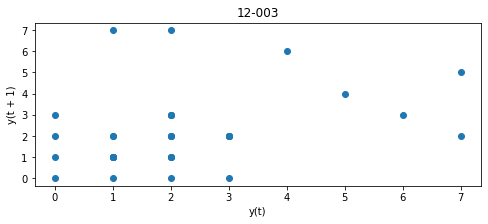

['12-066']


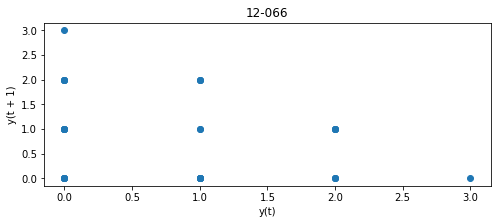

['13-058']


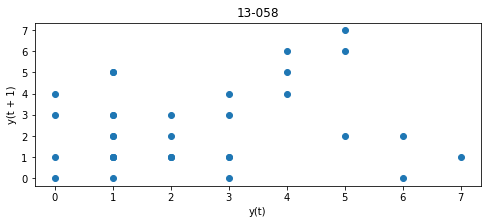

['14-017']


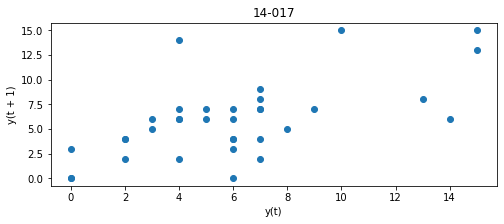

['10-005']


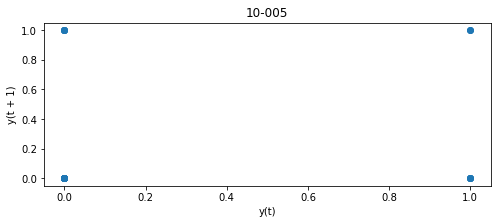

['03-047']


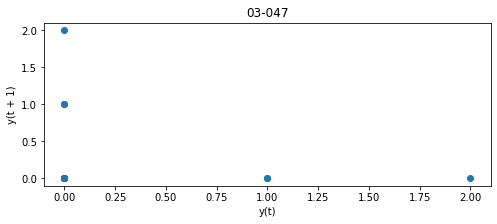

['07-062']


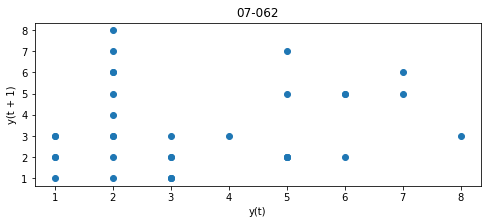

['15-075']


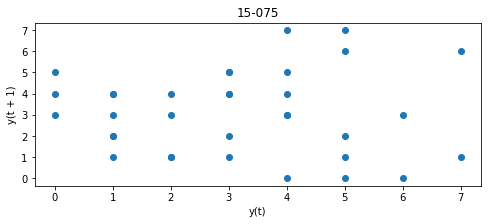

['03-157']


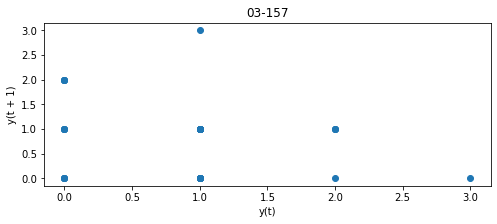

['17-008']


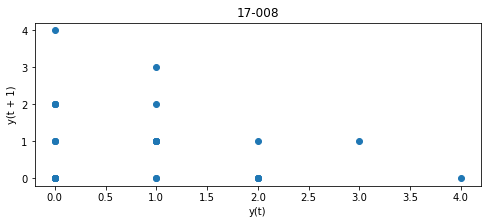

In [14]:
import random
from pandas.plotting import lag_plot

# Plot lag plots of neighborhood sample
dfs_sample = random.sample(dfs_neighborhood_list, 10)
for dfs in dfs_sample:
    fig, axes = plt.subplots(figsize=(8,3))
    ax = lag_plot(dfs['crime_count_t+1'], lag=1)
    print(dfs.key_neighb.unique())
    ax.set_title(dfs.key_neighb.unique()[0])
    plt.show()
    

['12-003']


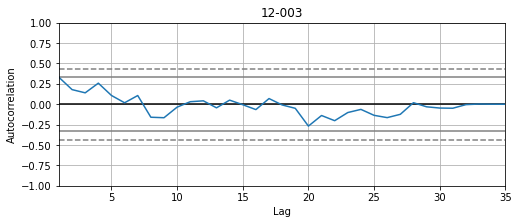

['12-066']


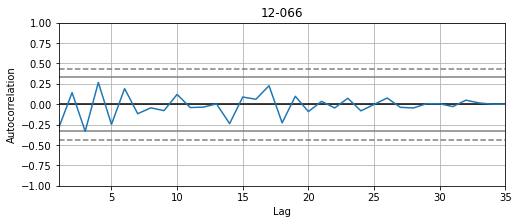

['13-058']


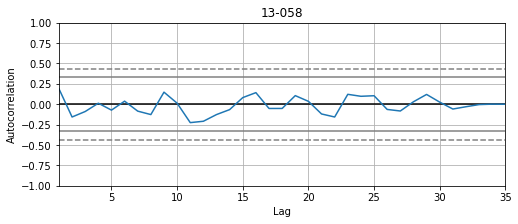

['14-017']


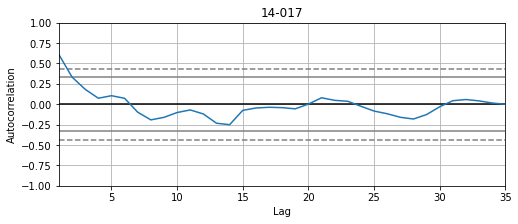

['10-005']


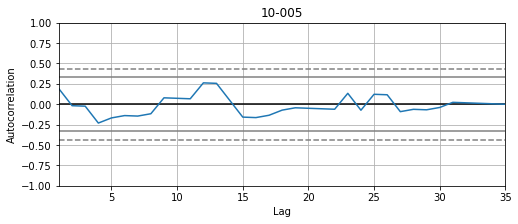

['03-047']


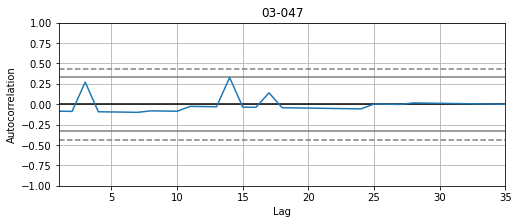

['07-062']


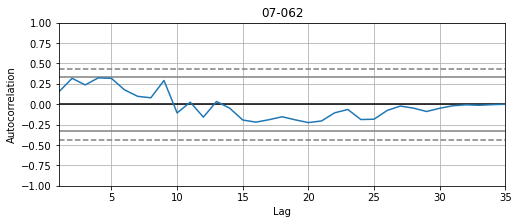

['15-075']


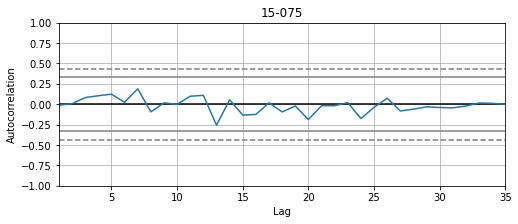

['03-157']


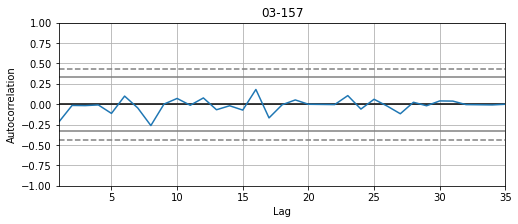

['17-008']


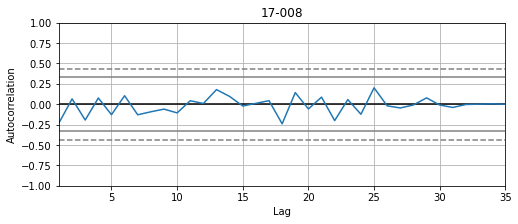

In [15]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation plots of neighborhood sample
for dfs in dfs_sample:
    fig, axes = plt.subplots(figsize=(8,3))
    ax = autocorrelation_plot(dfs['crime_count_t+1'])
    print(dfs.key_neighb.unique())
    ax.set_title(dfs.key_neighb.unique()[0])
    plt.show()

The correlograms and lag plots show that there is no correlation between the lagged variables and the variables. Therefore, the time series may be white noise. However, after checking the following:

White noise time series is defined by a zero mean, constant variance, and zero correlation.

The series isn't quite white noise, however, the small correlation between the variables and their lags suggests that they may not be temporallly dependent.

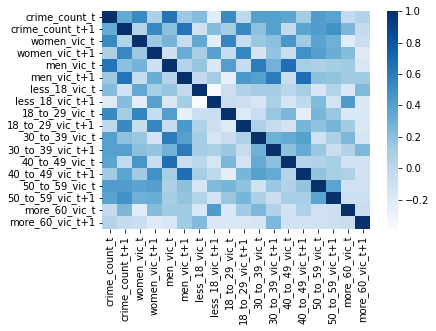

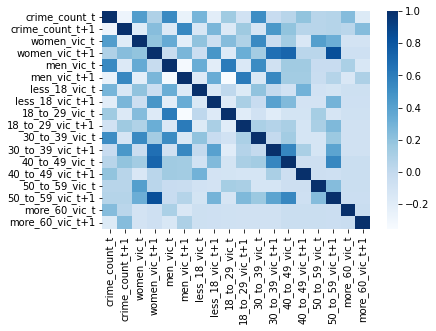

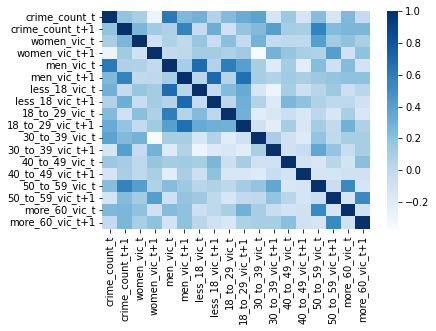

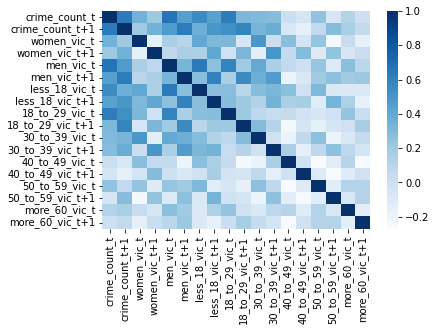

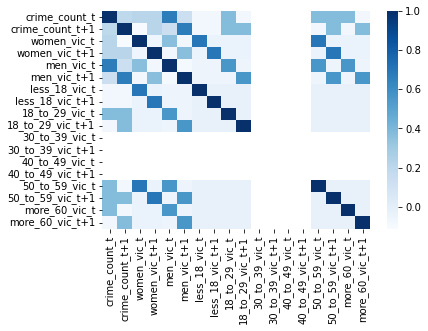

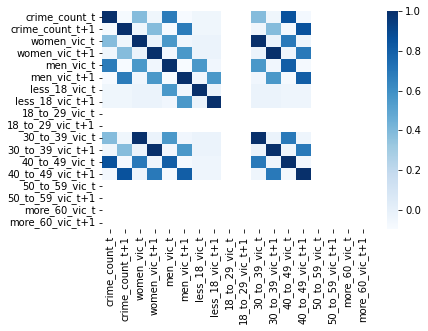

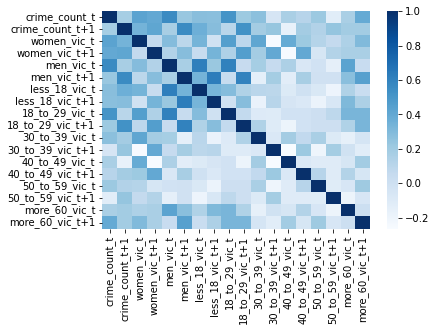

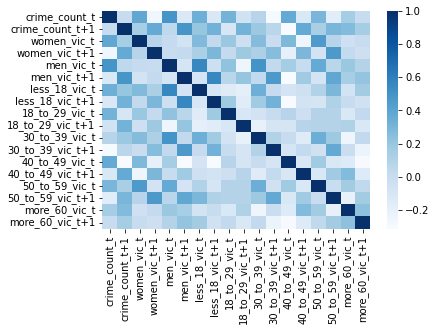

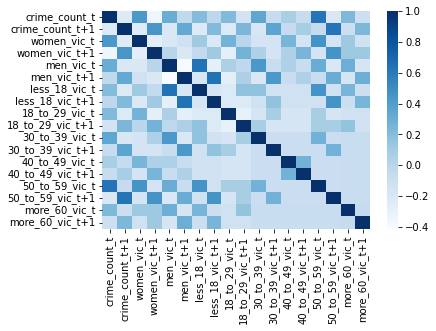

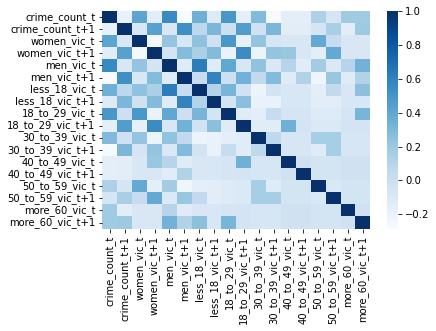

In [20]:
for dfs in dfs_sample:
    print(dfs.key_neighb.unique())
    sns.heatmap(dfs.corr(), cmap='Blues')
    plt.show()

In [25]:
dfs_neighborhood_list[2].describe()

,crime_count_t,crime_count_t+1,women_vic_t,women_vic_t+1,men_vic_t,men_vic_t+1,less_18_vic_t,less_18_vic_t+1,18_to_29_vic_t,18_to_29_vic_t+1,30_to_39_vic_t,30_to_39_vic_t+1,40_to_49_vic_t,40_to_49_vic_t+1,50_to_59_vic_t,50_to_59_vic_t+1,more_60_vic_t,more_60_vic_t+1
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000
mean,2.742857,2.628571,0.771429,0.771429,1.857143,1.771429,0.885714,0.885714,0.600000,0.571429,0.571429,0.514286,0.285714,0.257143,0.0,0.028571,0.085714,0.085714
std,1.930298,1.848461,1.031439,1.031439,1.263582,1.214755,1.105373,1.105373,0.913944,0.884032,0.739066,0.701739,0.518563,0.505433,0.0,0.169031,0.284029,0.284029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,4.000000,4.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000
max,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,0.0,1.000000,1.000000,1.000000


In [26]:
df_ts_final = pd.concat(dfs_neighborhood_list)
print(df_ts_final.shape)
df_ts_final.head()

(63525, 20)


,key_neighb,unique_id_time,crime_count_t,crime_count_t+1,women_vic_t,women_vic_t+1,men_vic_t,men_vic_t+1,less_18_vic_t,less_18_vic_t+1,18_to_29_vic_t,18_to_29_vic_t+1,30_to_39_vic_t,30_to_39_vic_t+1,40_to_49_vic_t,40_to_49_vic_t+1,50_to_59_vic_t,50_to_59_vic_t+1,more_60_vic_t,more_60_vic_t+1
unique_id,,,,,,,,,,,,,,,,,,,,
2019202-001,02-001,2019-02-01,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2019302-001,02-001,2019-03-01,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2019402-001,02-001,2019-04-01,0.0,1,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0
2019502-001,02-001,2019-05-01,1.0,1,0.0,0,1.0,2,0.0,1,1.0,0,0.0,1,0.0,0,0.0,0,0.0,0
2019602-001,02-001,2019-06-01,1.0,0,0.0,0,2.0,0,1.0,0,0.0,0,1.0,0,0.0,0,0.0,0,0.0,0


In [27]:
df_ts_final.to_csv(os.path.normpath(os.path.join(os.getcwd(), '../data/preprocessed')) + '/data_time_series_forecasting_final.csv')

# 6. Dataset for hotspot forecasting

In [ ]:
features_neighborhood_list = []
for neighborhood in df_ts.key_neighb.unique():
    
    dff = df_ts[df_ts.key_neighb == neighborhood]
    dff = dff.sort_values(by=('unique_id_time'))
    dff = dff[['cablebus_s', 'commer_ven', 'health_cen', 'metro_sta', 'pmarkets', 'pparking', 'hospitals', 'train_sta', 'trolebus_s', 'cablebus_l', 'ptransp_ro', 
               'main_roads', 'metro_line', 'rtp_lines', 'train_line', 'trolebus_l', 'centres_va', 'be_schools', 'commercial', 'industrial', 'service_un']]
    dff = dff.iloc[1:, :]
    features_neighborhood_list.append(dff)
dfs_features = pd.concat(features_neighborhood_list)
print(dfs_features.shape)
dfs_features.head()


(63525, 21)


,cablebus_s,commer_ven,health_cen,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_s,cablebus_l,ptransp_ro,main_roads,metro_line,rtp_lines,train_line,trolebus_l,centres_va,be_schools,commercial,industrial,service_un
unique_id,,,,,,,,,,,,,,,,,,,,,
2019202-001,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43
2019302-001,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43
2019402-001,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43
2019502-001,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43
2019602-001,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43


In [ ]:
df_h_final = pd.concat([df_ts_final, dfs_features], axis=1)
print(df_h_final.shape)
df_h_final.to_csv(os.path.normpath(os.path.join(os.getcwd(), '../data/preprocessed')) + '/data_hotspots_forecasting_final.csv')

(63525, 41)
